In [1]:
import scniche as sn
import scanpy as sc
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

print("Last run with scNiche version:", sn.__version__)

# set seed
sn.pp.set_seed()

/slurm/home/yrd/fanlab/qianjingyang/.conda/envs/scniche_v101/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Last run with scNiche version: 1.1.0


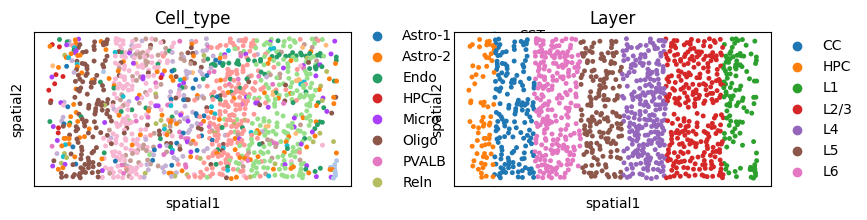

In [2]:
# download data from figshare (https://figshare.com/ndownloader/files/50249244)
# adata = sn.datasets.mouse_v1_starmap()
adata = sc.read('response-v1/brain_benchmark/STARmap/data/STARmap.h5ad')

plt.rcParams["figure.figsize"] = (4, 2)
sc.pl.embedding(adata, basis="spatial", color=['Cell_type', 'Layer'],s=50, )

In [3]:
# normalize
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

cutoff = 30
lr = 0.01
epochs = 100

# prepare
adata = sn.pp.cal_spatial_neighbors(adata=adata, celltype_key='Cell_type', mode='KNN', k_cutoff=cutoff, verbose=False)
adata = sn.pp.cal_spatial_exp(adata=adata, mode='KNN', k_cutoff=cutoff, is_pca=True, n_comps=10, verbose=False)
adata = sn.pp.prepare_data(adata=adata, verbose=False)
                
# training
model = sn.tr.Runner(adata=adata, device='cuda:0', verbose=False)
adata = model.fit(lr=lr, epochs=epochs)
                
# clustering
target_num = len(set(adata.obs['Layer']))
adata = sn.tr.clustering(adata=adata, target_k=target_num)

Train Epoch: 100: 100%|██████████| 100/100 [00:06<00:00, 16.52it/s, loss=21.6794]


Applying K-Means Clustering with 7 target cluster numbers...


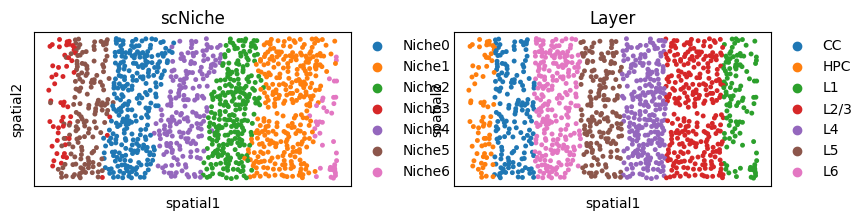

In [4]:
plt.rcParams["figure.figsize"] = (4, 2)
sc.pl.embedding(adata, basis="spatial", color=['scNiche', 'Layer'],s=50, )

In [5]:
adjusted_rand_score(adata.obs['Layer'], adata.obs['scNiche'])

0.6612272931160958